<a href="https://colab.research.google.com/github/bomiiisong/DeepLearning-with-Python/blob/master/NLP/Sentiment_Analysis_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

> ## Naver Movie Review data

In [4]:
import warnings
warnings.filterwarnings('ignore')

* Import Packages

In [5]:
import numpy as np
import keras

## Ⅰ. Naver Sentiment Movie Corpus v1.0

> ### 1) File Download

* Train : 150000
* Test : 50000

In [6]:
tr_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt'
path_to_train_file = keras.utils.get_file('train.txt', tr_url)

te_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt'
path_to_test_file = keras.utils.get_file('test.txt', te_url)

> ### 2) 'X' Data

* 각 열은 tab(\t)으로 구분
* '0'(부정), '1'(긍정)

In [7]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

print(f'Length of text: {len(train_text)} characters')
print(f'Length of text: {len(test_text)} characters')

print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters
id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


> ### 3) Y Label

* 각 문장을 개행문자(\n) 로 분리 후, 3열(index[2])의 값을 정수로 추출

In [8]:
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t')>0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t')>0])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


## Ⅱ. Data Cleaning

> ### 1) 'X' Data Cleaning

https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py

In [9]:
import re

def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t')>0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]

> ### 2) 단어별 최대 길이 조정

* 문장 내 단어별 길이 확인

In [10]:
sentences = [sentence.split(' ') for sentence in train_text_X]

for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


* 각 문장의 단어 길이 시각화

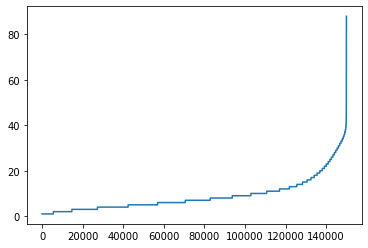

142587


In [11]:
import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()

plt.plot(sentence_len)
plt.show()

print(sum([int(i <= 25) for i in sentence_len]))

* 단어의 앞에서부터 5글자로 자르기

In [12]:
sentences_new = []

for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25]) # 4글자까지 25줄 출력

sentences = sentences_new

for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


## Ⅲ. Tokenizer( ) and pad_sequences( )

> ### 1) 2000개 단어 사용

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)

train_X = pad_sequences(train_X, padding = 'post')

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


> ### 2) Tokenizer( ) 동작 확인

* 존재하는 단어 매핑
    * '경우는' , '연기가'

In [14]:
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
print(tokenizer.index_word[106])

temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)  # 존재하는 단어인 '경우는', '연기가'의 인덱스 번호 출력

temp = pad_sequences(temp, padding = 'post')
print(temp)

경우는
잊혀질
연기가
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


## Ⅳ. Modeling

> ### 1) Model Structure

In [15]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Embedding(20000, 300, input_length = 25))

model.add(layers.LSTM(32))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                42624     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 6,042,690
Trainable params: 6,042,690
Non-trainable params: 0
_________________________________________________________________


> ### 2) Model Fit

* 약 10분 소요

In [16]:
%%time

history = model.fit(train_X, train_Y, epochs=10, batch_size=128,
                    validation_split=0.2)

Epoch 1/10
938/938 [==============================] - 106s 80ms/step - loss: 0.5470 - accuracy: 0.6810 - val_loss: 0.3773 - val_accuracy: 0.8222
Epoch 2/10
938/938 [==============================] - 74s 79ms/step - loss: 0.3199 - accuracy: 0.8545 - val_loss: 0.3865 - val_accuracy: 0.8232
Epoch 3/10
938/938 [==============================] - 73s 78ms/step - loss: 0.2637 - accuracy: 0.8733 - val_loss: 0.4287 - val_accuracy: 0.8178
Epoch 4/10
938/938 [==============================] - 75s 80ms/step - loss: 0.2250 - accuracy: 0.8920 - val_loss: 0.4530 - val_accuracy: 0.8126
Epoch 5/10
938/938 [==============================] - 75s 80ms/step - loss: 0.1902 - accuracy: 0.9075 - val_loss: 0.5577 - val_accuracy: 0.8047
Epoch 6/10
938/938 [==============================] - 75s 80ms/step - loss: 0.1645 - accuracy: 0.9196 - val_loss: 0.6483 - val_accuracy: 0.8050
Epoch 7/10
938/938 [==============================] - 75s 80ms/step - loss: 0.1439 - accuracy: 0.9283 - val_loss: 0.7424 - val_accuracy

## Ⅴ. Validation

> ### 1) Visualization

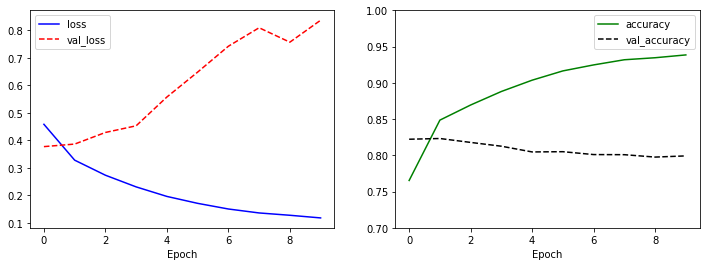

In [17]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

> ### 2) Loss & Accuracy

* [loss, accuracy]

In [18]:
# 개행문자(\n), 아이디/내용/레이블 구분자(\t) 처리하기
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
# clean_str : 한글 외의 특수문자 제거
test_text_X = [clean_str(sentence) for sentence in test_text_X]

#띄어쓰기로 구분
sentences = [sentence.split(' ') for sentence in test_text_X]

sentences_new = []

for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

[0.848872184753418, 0.792680025100708]

## Ⅵ. 문장 감성 분석

* 입력 단어에 따라 감성 분석 결과 변화
    * '1' 긍정 -> '0' 부정

In [20]:
np.set_printoptions(precision=6, suppress=True) # 지수표현식 제거

test_sentence = '재미있을 줄 알았는데 완전 실망했다. 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')

test_sentences = []
now_sentence = []

for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)

prediction = model.predict(test_X_1)

for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미있을']
[0.230059 0.769941]
['재미있을', '줄']
[0.151593 0.848407]
['재미있을', '줄', '알았는데']
[0.268087 0.731913]
['재미있을', '줄', '알았는데', '완전']
[0.008035 0.991965]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.008035 0.991965]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '돈이']
[0.99905 0.00095]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '돈이', '아까웠다.']
[0.99905 0.00095]
